In [9]:
getwd()

[1] "/home/touch/laboratory/Projects/qPCR Analysis of Housekeeping Genes"

In [10]:
R.Version()

$platform
[1] "x86_64-conda-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "2.0"

$year
[1] "2022"

$month
[1] "04"

$day
[1] "22"

$`svn rev`
[1] "82229"

$language
[1] "R"

$version.string
[1] "R version 4.2.0 (2022-04-22)"

$nickname
[1] "Vigorous Calisthenics"

In [14]:
install.packages("ggplot2", dependencies = TRUE, INSTALL_opts = '--no-lock')
install.packages("MCMC.qpcr", dependencies = TRUE, INSTALL_opts = '--no-lock')
install.packages("dplyr", dependencies = TRUE, INSTALL_opts = '--no-lock')


also installing the dependencies ‘curl’, ‘httr’, ‘units’, ‘covr’, ‘ragg’, ‘sf’


Warning message in install.packages("ggplot2", dependencies = TRUE, INSTALL_opts = "--no-lock"):
“installation of package ‘curl’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE, INSTALL_opts = "--no-lock"):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE, INSTALL_opts = "--no-lock"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE, INSTALL_opts = "--no-lock"):
“installation of package ‘httr’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE, INSTALL_opts = "--no-lock"):
“installation of package ‘sf’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE, INSTALL_opts = "--no-lock"):
“installation of package ‘covr’ had non-zero exi

In [15]:
library("MCMC.qpcr")
library("dplyr")
library("ggplot2")

In [16]:
getwd()

[1] "/home/touch/laboratory/Projects/qPCR Analysis of Housekeeping Genes"

In [17]:
myc2 <- read.csv("Cq/myc2_ts.csv")
ubc1 <- read.csv("Cq/ubc2_ts.csv")
tuba2<- read.csv("Cq/tuba2_ts.csv")
tubb1<- read.csv("Cq/tubb1_ts.csv")
myc2 <- within(myc2, Biological.Set.Name[Content == 'NTC'] <- "Control")
ubc1 <- within(ubc1, Biological.Set.Name[Content == 'NTC'] <- "Control")
tuba2 <- within(tuba2, Biological.Set.Name[Content == 'NTC'] <- "Control")
tubb1 <- within(tubb1, Biological.Set.Name[Content == 'NTC'] <- "Control")
mergeda <- merge(x=myc2, y=ubc1, by = "Well")
merged1 <- data.frame(mergeda["Well"],mergeda["Biological.Set.Name.x"],mergeda["Cq.x"],mergeda["Cq.y"])
colnames(merged1) <- c('sample', 'Time', "Myc2", "Ubc2")
mergedb <- merge(x=tubb1, y=tuba2, by = "Well")
merged2 <- data.frame(mergedb["Well"],mergedb["Biological.Set.Name.x"],mergedb["Cq.x"],mergedb["Cq.y"])
colnames(merged2) <- c('sample', 'Time', "Tubb1", "Tuba2")
mergedc <- merge(x=merged1, y=merged2, by = "sample")
df <- mergedc[c("sample", "Time.x", "Myc2", "Ubc2", "Tuba2","Tubb1")]
df <- df[order(df$Time.x),]
df <- df %>% mutate_all(~ifelse(is.nan(.), NA, .))


[1] "Slope:-3.422"
[1] "E:1.9598677563302"


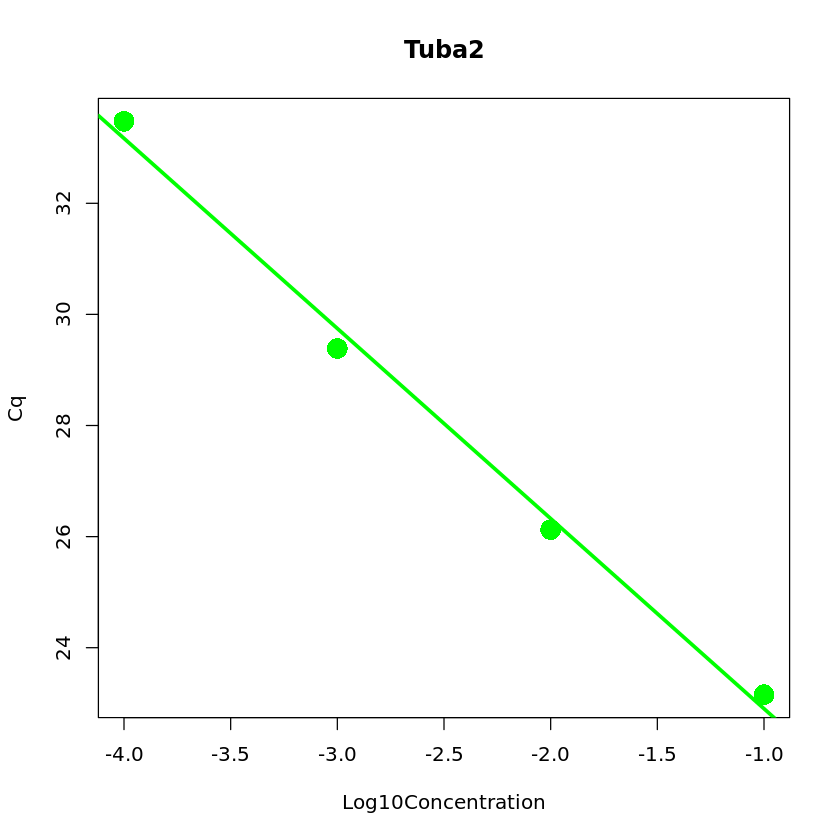

[1] "Slope:-3.38236486486486"
[1] "E:1.97538218000867"


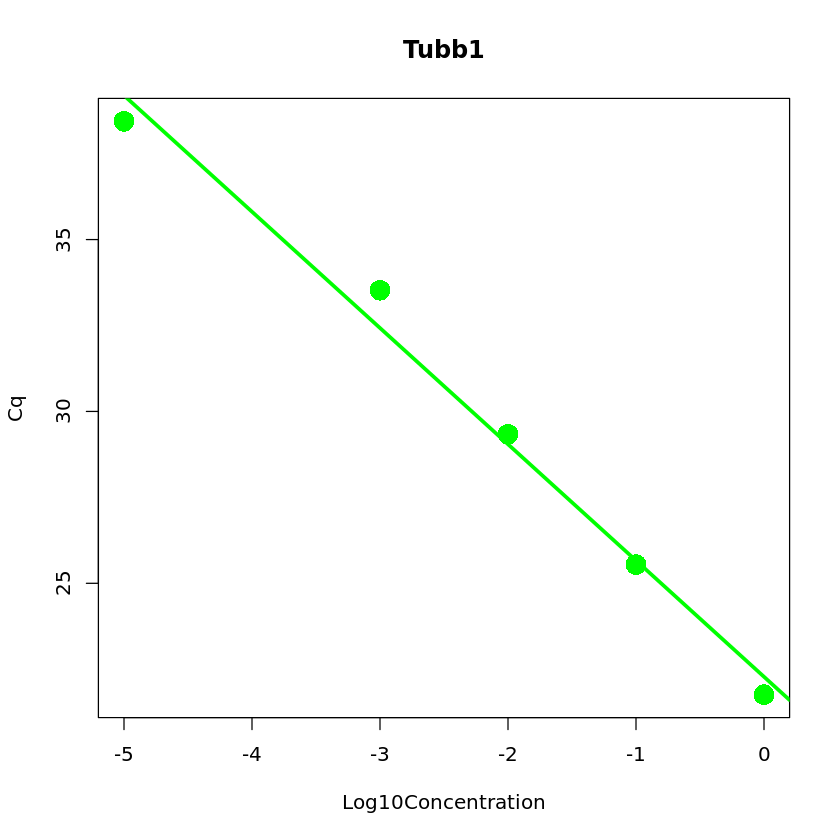

[1] "Slope:-3.537"
[1] "E:1.91745629411825"


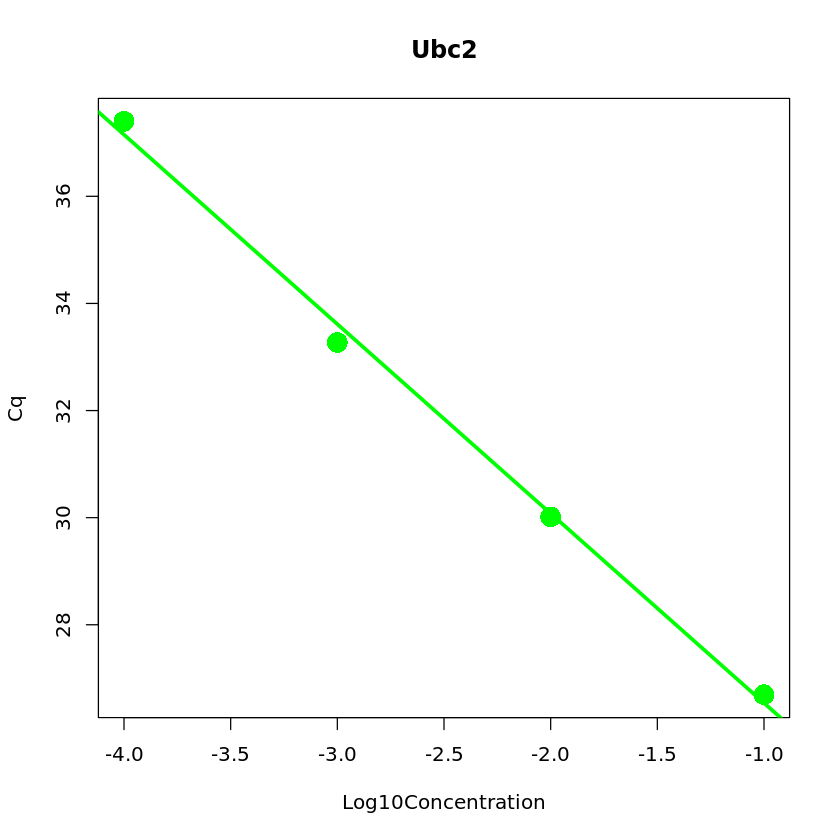

In [7]:
get_avg <- function(a_vec){
    vec <- c()
    for (i in seq(1,length(a_vec), by=2)){
        item <- (a_vec[i] + a_vec[i+1])/2
        vec <-c(vec,item)
    }
    return(vec)
}
#TUBA2
dilutTB2 <- c(0,-1,-2,-3,-5)
stdTB2 <- c(7,8,9,10,12)
valTB2 <- c(21.76,21.76,25.56,25.53, 29.89, 28.78, 34.35, 32.70,38.44,38.44)
#TUBB1
dilutTA1 <- c(-1,-2,-3,-4)
stdTA1 <- c(1,2,3,4)
valTA1 <- c(26.59,26.80,30.10,29.93,33.36,33.18,37.35,37.45)
#UBC2
dilutBC2 <- c(-1,-2,-3,-4)
stdBC2 <- c(1,2,3,4)
valBC2 <- c(22.83,23.48,26.24,26.01,29.36,29.41,33.54,33.41)

dilutions <- list(dilutBC2,dilutTB2,dilutTA1)
std <- list(stdBC2,stdTB2,stdTA1)
val <- list(valBC2,valTB2,valTA1)
names <-c("Tuba2","Tubb1","Ubc2")


for (i in seq(1,3)){
    v <- get_avg(val[[i]])
    typeof(v)
    temp <- data.frame(dilutions[[i]],std[[i]],v)
    colnames(temp) <- c("dilut", "std", "v")
    ax <- unlist(temp["dilut"]) 
    ay <- unlist(temp["v"])
    bf <- lm(ay ~ ax)
    cf <- coef(bf)
    Intercept <- cf[1]
    Slope <- cf[2]
    E=10^(-1/Slope)
    temp
    plot(ax, ay, pch = 16, cex = 2.3, col = "green", main = names[i], xlab="Log10Concentration",ylab="Cq") 
    abline(Intercept,Slope, col="green", lwd=3)
    print(paste0("Slope:",Slope))
    print(paste0("E:",E))

}

#    E = 10^(-1/slope)


In [8]:
df

,sample,Time.x,Myc2,Ubc2,Tuba2,Tubb1
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
71,H11,Control,38.48929,NA,NA,NA
72,H12,Control,39.56614,NA,NA,NA
2,B02,Day 1,25.74608,22.60834,26.86412,25.66708
8,B08,Day 1,26.23204,22.68069,27.93294,25.71699
14,C02,Day 1,26.49957,23.32381,26.73457,25.70090
20,C08,Day 1,26.90437,23.16759,27.61747,25.66255
26,D02,Day 1,26.06509,22.19980,26.52296,24.54827
32,D08,Day 1,26.31157,22.16755,26.44992,25.37692
38,E02,Day 1,26.26913,21.73222,27.39571,26.50713


In [14]:
gene <- c("Myc2", "Ubc2", "Tubb1", "Tuba2")
efficiency <- c(1.95, 1.96, 1.91, 1.97)
eff <- data.frame(gene, efficiency)
colnames(eff) <- c("gene", "efficiency")
show(eff)

   gene efficiency
1  Myc2       1.95
2  Ubc2       1.96
3 Tubb1       1.91
4 Tuba2       1.97


In [15]:
qs=cq2counts(data=df, effic=eff, genecols=c(3:6),condcols=c(1:2))

In [16]:
show(qs)

    count  gene sample  Time.x
1       0  Myc2    H11 Control
2       0  Myc2    H12 Control
3    1837  Myc2    B02   Day 1
4    1328  Myc2    B08   Day 1
5    1110  Myc2    C02   Day 1
6     847  Myc2    C08   Day 1
7    1484  Myc2    D02   Day 1
8    1259  Myc2    D08   Day 1
9    1295  Myc2    E02   Day 1
10   1310  Myc2    E08   Day 1
11   2455  Myc2    F02   Day 1
12   1380  Myc2    F08   Day 1
13    415  Myc2    B06  Day 14
14    524  Myc2    B12  Day 14
15    108  Myc2    C06  Day 14
16    179  Myc2    C12  Day 14
17    243  Myc2    D06  Day 14
18    267  Myc2    D12  Day 14
19    339  Myc2    E06  Day 14
20    221  Myc2    E12  Day 14
21    310  Myc2    F06  Day 14
22    340  Myc2    F12  Day 14
23    410  Myc2    G02  Day 21
24    375  Myc2    G03  Day 21
25    422  Myc2    G04  Day 21
26    349  Myc2    G05  Day 21
27    470  Myc2    G06  Day 21
28    761  Myc2    G07  Day 21
29    377  Myc2    G08  Day 21
30    621  Myc2    G09  Day 21
31    367  Myc2    G10  Day 21
32    50

In [17]:
dl=cq2log(data=df,genecols=(3:6),condcols=c(1:2),effic=eff)

In [18]:
dl

,count,gene,sample,Time.x
,<dbl>,<fct>,<fct>,<fct>
1,-25.70,Myc2,H11,Control
2,-26.42,Myc2,H12,Control
3,-17.19,Myc2,B02,Day 1
4,-17.52,Myc2,B08,Day 1
5,-17.70,Myc2,C02,Day 1
6,-17.97,Myc2,C08,Day 1
7,-17.41,Myc2,D02,Day 1
8,-17.57,Myc2,D08,Day 1
9,-17.54,Myc2,E02,Day 1


$FIXED
[1] "count~0+gene++gene:Time.x"

$RANDOM
[1] "~idh(gene):sample"



Warning message in MCMCglmm(formula(ff), random = formula(rr), data = ddn, ...):
“some fixed effects are not estimable and have been removed. Use singular.ok=TRUE to sample these effects, but use an informative prior!”



                       MCMC iteration = 0

                       MCMC iteration = 1000

                       MCMC iteration = 2000

                       MCMC iteration = 3000

                       MCMC iteration = 4000

                       MCMC iteration = 5000

                       MCMC iteration = 6000

                       MCMC iteration = 7000

                       MCMC iteration = 8000

                       MCMC iteration = 9000

                       MCMC iteration = 10000

                       MCMC iteration = 11000

                       MCMC iteration = 12000

                       MCMC iteration = 13000


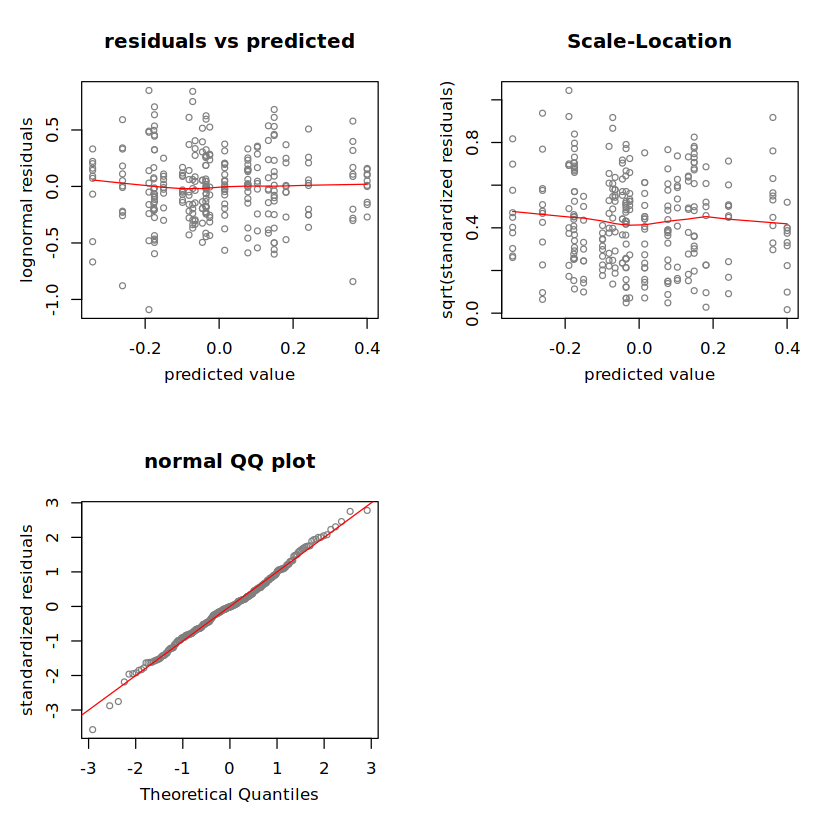

In [19]:
classic=mcmc.qpcr.classic(fixed="Time.x",
data=dl,
controls=c("Ubc2","Tubb1","Tuba2"),
pr=T,
pl=T
)
diagnostic.mcmc(model = classic,
col="grey50",
cex=0.8)

In [20]:
summary(classic)


 Iterations = 3001:12991
 Thinning interval  = 10
 Sample size  = 1000 

 DIC: 185.044 

 G-structure:  ~idh(gene):sample

                 post.mean  l-95% CI  u-95% CI eff.samp
geneMyc2.sample  1.617e-05 1.241e-16 9.975e-06    68.46
geneTuba2.sample 8.895e-04 6.464e-10 5.242e-03    25.74
geneTubb1.sample 3.105e-03 2.392e-16 1.848e-02    18.74
geneUbc2.sample  1.183e-03 4.820e-13 6.970e-03    45.72

 R-structure:  ~units

      post.mean l-95% CI u-95% CI eff.samp
units    0.1047   0.0858   0.1251    89.62

 Location effects: count ~ 0 + gene + +gene:Time.x 

                       post.mean  l-95% CI  u-95% CI eff.samp  pMCMC    
geneMyc2               -0.261166 -0.451427 -0.076107    636.1  0.014 *  
geneTuba2              -0.189782 -0.391460  0.007285   1000.0  0.064 .  
geneTubb1               0.361605  0.147228  0.565499    864.8 <0.001 ***
geneUbc2               -0.176638 -0.372480  0.028141    883.2  0.088 .  
geneMyc2:Time.xDay 1    0.196201 -0.112623  0.437528   1000.0  0.17

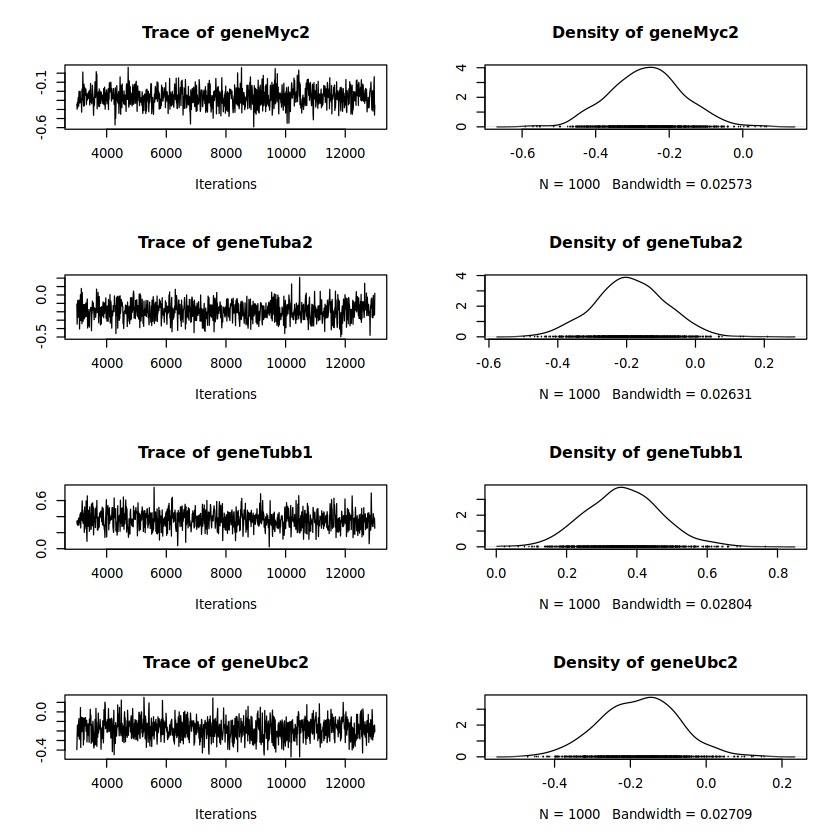

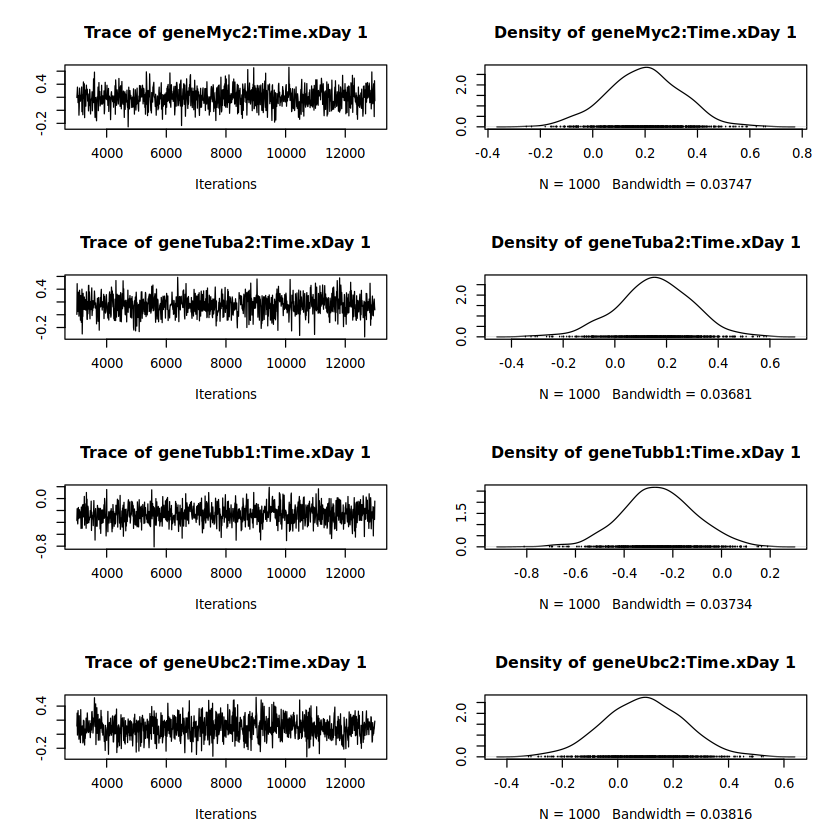

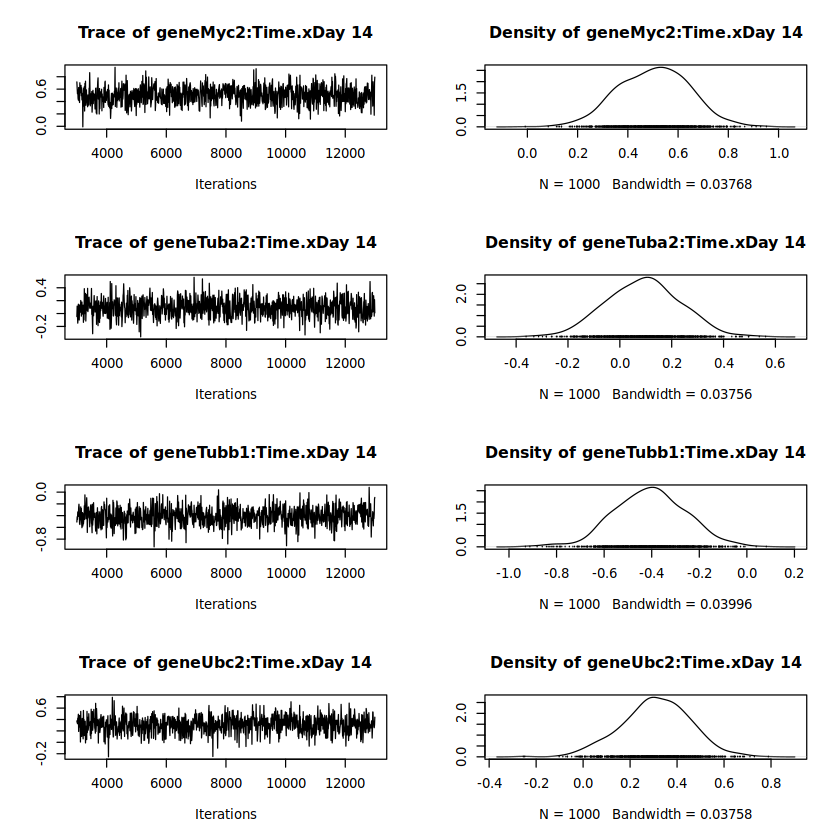

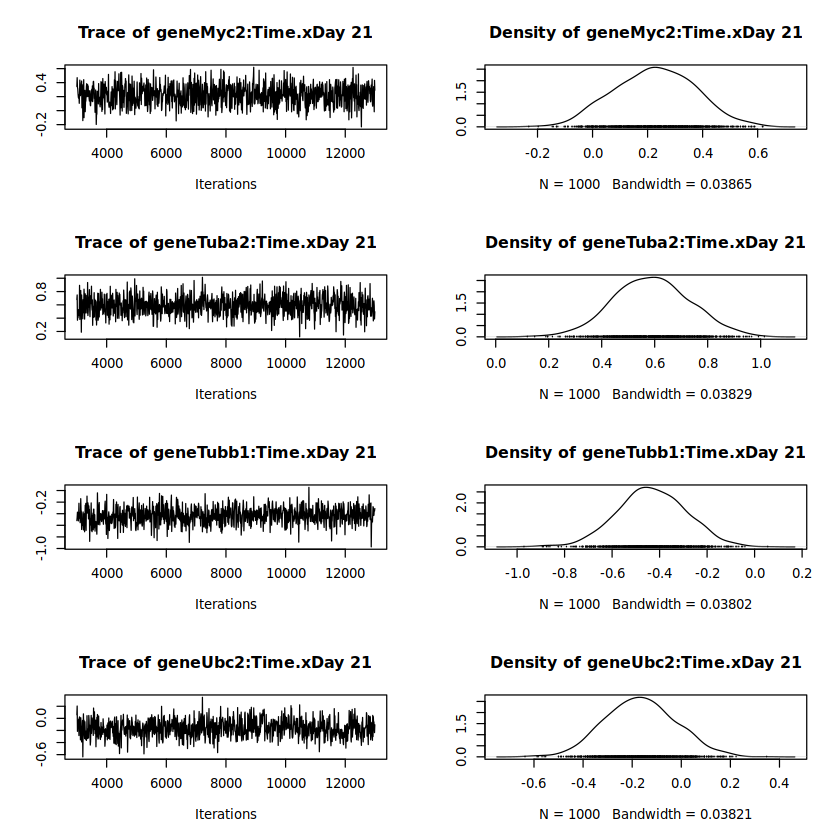

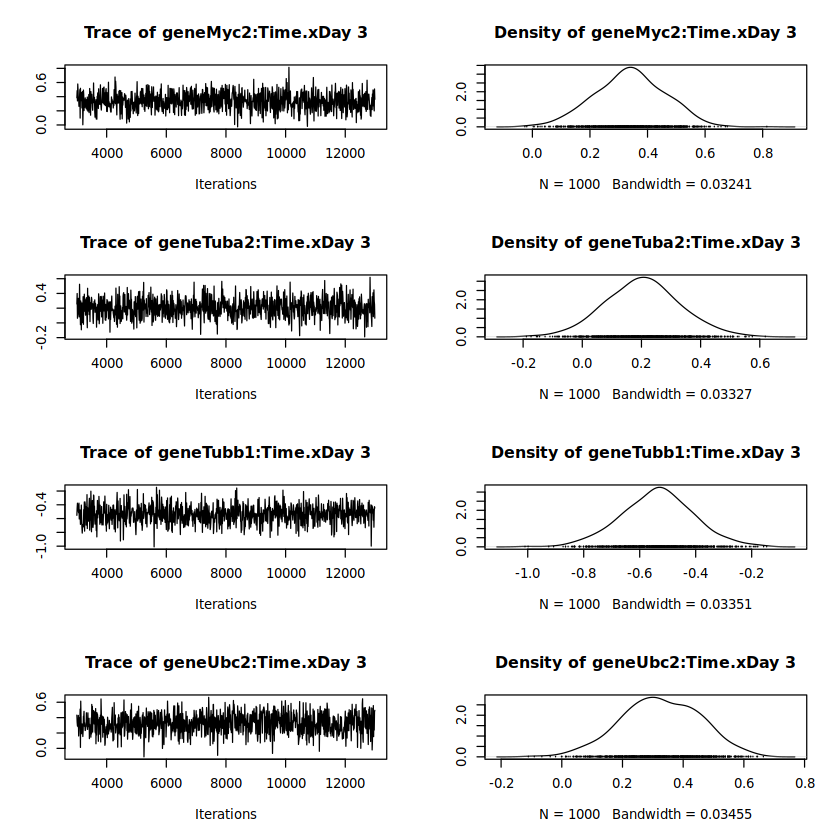

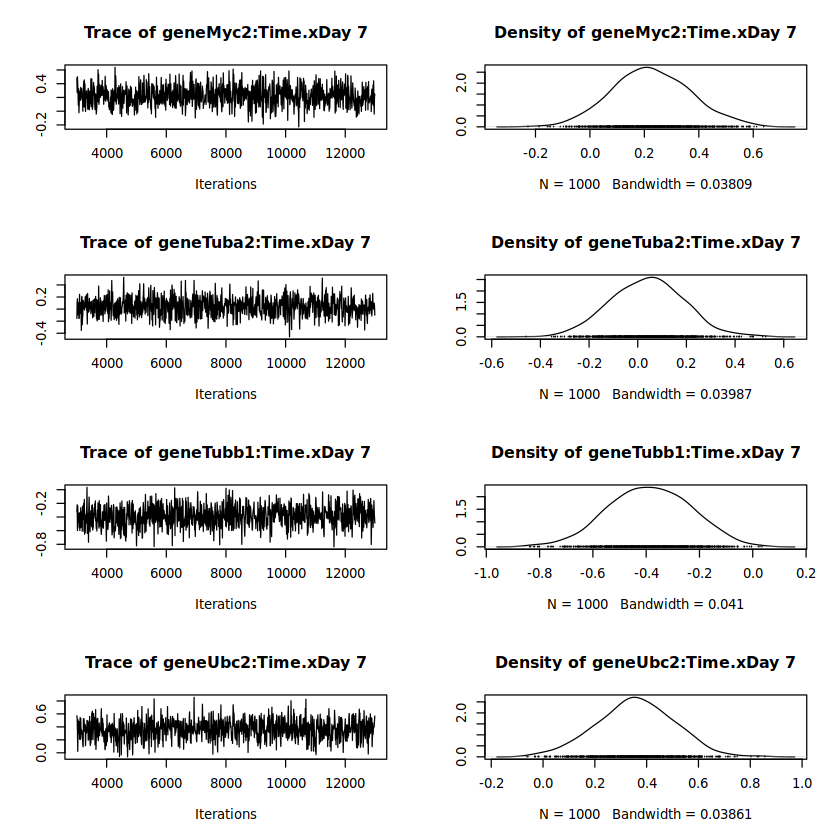

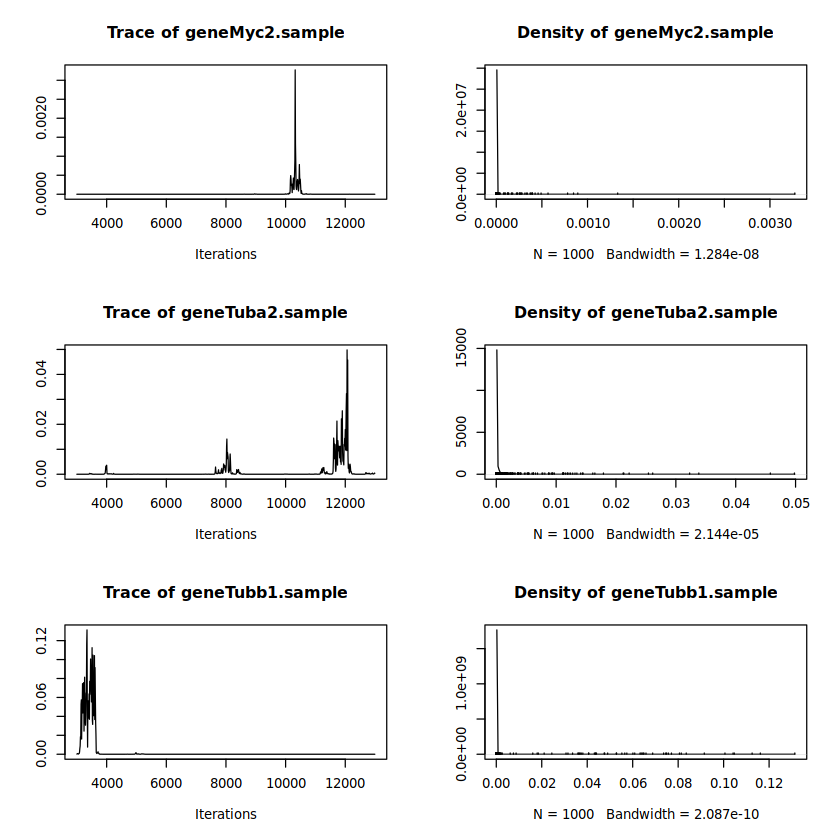

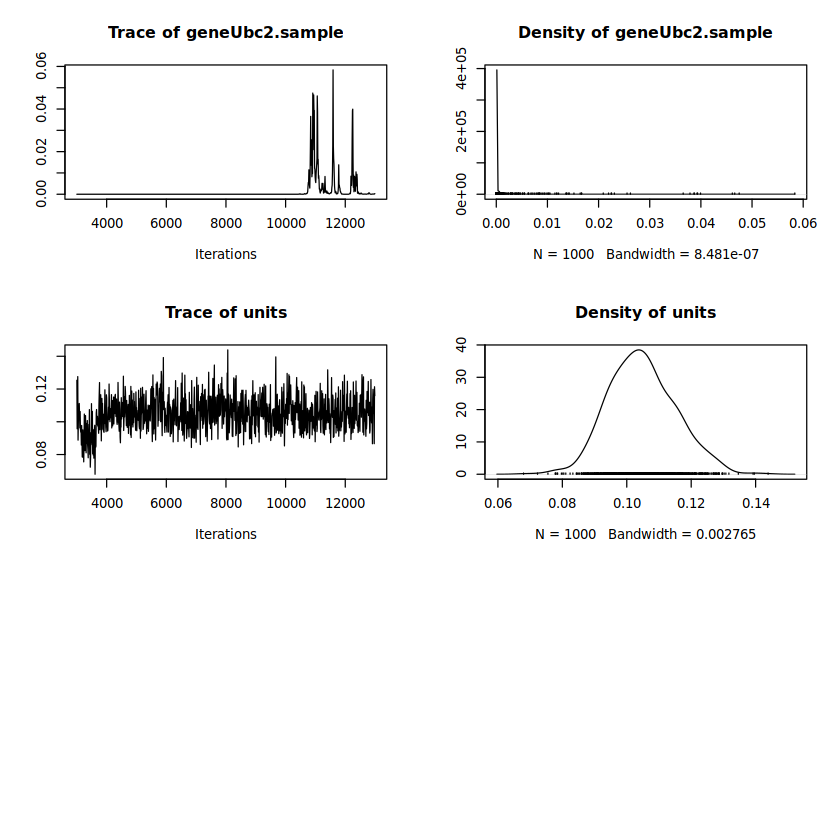

In [21]:
plot(classic)

In [22]:
s1=HPDsummary(model=classic,data=dl)

ERROR: Error in apply(samps, 2, function(x) {: dim(X) must have a positive length


In [198]:
s0=HPDsummary(model=classic,data=dl,relative=TRUE)

NULL


ERROR: Error in apply(samps, 2, function(x) {: dim(X) must have a positive length


In [13]:
HPDsummary <-
function(model,data,xgroup=NULL,genes=NA,relative=FALSE,
log.base=2,summ.plot=TRUE,ptype="z",...) {
	
#model=msr3;data=qs;xgroup=NULL;genes=NA;relative=FALSE;log.base=2;summ.plot=TRUE;ptype="z"

	mm=model;base=log.base
	gene.results=list()
	trms=attr(terms(mm$Fixed$formula),"term.labels")[grep("gene:",attr(terms(mm$Fixed$formula),"term.labels"))]
	trms=sub("gene:","",trms)
	sols=colnames(mm$Sol)
	if (is.na(genes[1])) { 
		genes=sub("gene","",sols[grep("gene.*$",sols)])
		genes=unique(sub(":.*","",genes))	
	}
	facts =list()
	for (t in trms) {
		if (!grepl(":",t)) { facts =append(facts,list(levels(data[,t])))}
	}
	names(facts)=trms[1:length(facts)]
	nfactors=length(facts)
	if (nfactors>2) { 
		stop("not implemented for more than 2 crossed factors")
	}
	gsols=c();fac1=c();fac2=c();samps=c();skips=c()
	
	globalInt=rep(0,length(mm$Sol[,1]))	
	if(sols[1]=="(Intercept)") { 
		globalInt=rep(mean(mm$Sol[,"(Intercept)"]),length(mm$Sol[,1]))
	} 
	
	interaction=0
	if (nfactors==2) {
		sol=paste("gene",genes[2],":",names(facts)[1],facts[[1]][2],":",names(facts)[2],facts[[2]][2],sep="")
		if (sol %in% sols) {
			interaction=1
		}
	}
	
	for (gene in genes) {
		sol=paste("gene",gene,sep="")
		if (!(sol %in% sols)) colnames(mm$Sol)[1]=sol
	}
	sols=colnames(mm$Sol)	

	for (gene in genes) {
		fac1g=c();fac2g=c();sampsg=c();skip=FALSE
		for (lev1 in 1:length(facts[[1]])) {
			if (nfactors==2) {
				for (lev2 in 1:length(facts[[2]])) {
					if (lev1==1 & lev2==1) { 
						sol=paste("gene",gene,sep="")
						if(sum(grep(sol,sols))==0) {
							skip=TRUE
							next
						}
						samp=(globalInt+mm$Sol[,sol])*as.numeric(!relative)
						print("check0")
						print(samp)
						int0=samp
					} else {
						if (lev2==1) { 
							sol=paste("gene",gene,":",names(facts)[1],facts[[1]][lev1],sep="")
							if(sum(grep(sol,sols))==0) {
								skip=TRUE
								next
							}
							
							samp=int0+mm$Sol[,sol]
							print(samp)
							int2=mm$Sol[,sol]
						} else {
							if (lev1==1) { 
								sol=paste("gene",gene,":",names(facts)[2],facts[[2]][lev2],sep="") 
								if(sum(grep(sol,sols))==0) {
									skip=TRUE
									next
								}
								samp=int0+mm$Sol[,sol]
								int1=mm$Sol[,sol]
							} else {
								sol=paste("gene",gene,":",
								names(facts)[1],facts[[1]][lev1],
								":",names(facts)[2],facts[[2]][lev2],sep="") 
								if(sum(grep(sol,sols))==0 & interaction==1) {
									skip=TRUE
									next
								}
								if (interaction==1) {
									samp=int0+int1+int2+mm$Sol[,sol]
								} else { 
									samp=int0+int1+int2
								}
							}
						}
					}
		#			print(paste(lev1,lev2,sol))
					if (skip) { 
#						genes=genes[!(genes %in% gene)]						
						next 
					}
					gsols=append(gsols,gene)
					fac1g=append(fac1g,facts[[1]][lev1])
					fac2g=append(fac2g,facts[[2]][lev2])
					sampsg=cbind(sampsg,samp)
				}
			} else {
				if (lev1==1) { 
						sol=paste("gene",gene,sep="") 
						if(sum(grep(sol,sols))==0) {
							skip=TRUE
							next
						}
						samp=(globalInt+mm$Sol[,sol])*as.numeric(!relative)
						print("check1")
						print(samp)
						int0=samp
				} else {
					sol=paste("gene",gene,":",
					names(facts)[1],facts[[1]][lev1],sep="")
					if(sum(grep(sol,sols))==0) {
						skip=TRUE
						next
					}
					samp=int0+mm$Sol[,sol]
					print("check2")
					print(samp)
				}
				if (skip) { 
#					genes=genes[!(genes %in% gene)]
					next 
				}
				gsols=append(gsols,gene)
				fac1g=append(fac1g,facts[[1]][lev1])
				sampsg=cbind(sampsg,samp)
			}
		}
		if (skip) { 
			skips=append(skips,gene)
			next 
		}
		fac1=append(fac1,fac1g)
		samps=cbind(samps,sampsg)
		if (nfactors==2) { fac2=append(fac2,fac2g) }
		sampsg=data.frame(sampsg)
		if (nfactors==2) {
			gres=matrix(nrow=length(fac1g),ncol=length(fac1g),
			dimnames=list("pvalue"=paste(names(facts)[1],fac1g,":",
			names(facts)[2],fac2g,sep=""),
			"difference"=paste(names(facts)[1],fac1g,":",
			names(facts)[2],fac2g,sep="")))
		} else { 
			gres=matrix(nrow=length(fac1g),ncol=length(fac1g),
			dimnames=list("pvalue"=fac1g,"difference"=fac1g))
		}
		for (i in 1:(length(fac1g)-1)) {
			for (j in (i+1):length(fac1g)) {
				diff=sampsg[,j]-sampsg[,i]
				gres[j,i]=mcmc.pval(diff,ptype=ptype)
				gres[i,j]=mean(diff)/log(base)
			}	
		}		
		gene.results=append(gene.results,list(gres))
		names(gene.results)[length(gene.results)]=gene		
	}

	genes=genes[!(genes %in% skips)]
	for (ge in skips) { 
		gsols=gsols[-c(grep(ge,gsols))]		
	}
	big.summary=data.frame(cbind("gene"=gsols,"f1"=fac1))
	names(big.summary)[2]=names(facts[1])
	if(nfactors==2) {
		big.summary$f2=fac2
		names(big.summary)[3]=names(facts[2])
	}
		print("check3")
		print(samps)
	samps=apply(samps,2, function(x){ return(x/log(base)) })
	mns=apply(samps,2,mean)
	sds=apply(samps,2,sd)
	lower=apply(samps,2,function(x) { return(quantile(x,0.05)) })
	upper=apply(samps,2,function(x) { return(quantile(x,0.95)) })
	big.summary=cbind(big.summary,"mean"=mns,
	"sd"=sds,"lower"=lower,"upper"=upper)
	ploo=NULL

	if(relative) {
		if (nfactors==2) { 
			remov=which(
				big.summary[,2]==facts[[1]][1] & big.summary[,3]==facts[[2]][1]
			)
			big.summary=big.summary[-remov,] 
		} else { 	
			big.summary=big.summary[big.summary[,2]!=facts[[1]][1],] 
			}
	}
	if (is.null(xgroup)) {
		xgroup=names(facts[1])
		if(nfactors==2) { facet=names(facts[2]) }
	} else {
		if (xgroup==names(facts[1])) {
			if(nfactors==2) { facet=names(facts[2]) }
		} else {
			facet=names(facts[1])
		}
	}

	if(summ.plot) { 
		if (!relative) { 
			if (nfactors==2) {
				ploo=summaryPlot(big.summary,xgroup=xgroup,
				facet=facet,type="line",log.base=log.base,...) 
			} else {
				ploo=summaryPlot(big.summary,xgroup=names(facts[1]),type="line",log.base=log.base,...) 
			}
		} else {
			if (nfactors==2) {
				ploo=summaryPlot(big.summary,xgroup=xgroup,
				facet=facet,type="bar",log.base=log.base,...) 
			} else {
				ploo=summaryPlot(big.summary,xgroup=names(facts[1]),type="bar",log.base=log.base,...) 
			}
		}
	}

	return(list("summary"=big.summary,"geneWise"=gene.results,"ggPlot"=ploo))
}

In [30]:
data(beckham.data)
data(beckham.eff)

In [31]:
qs=cq2counts(data=beckham.data, effic=beckham.eff, genecols=c(4:13),condcols=c(1:3))

In [32]:
qs$treatment.time=as.factor(paste(qs$tr,qs$time,sep="."))

In [33]:
qs$treatment.time=relevel(qs$treatment.time,ref="control.0h")

In [34]:
naive=mcmc.qpcr(data=qs, fixed="treatment.time")

$PRIOR
$PRIOR$R
$PRIOR$R$V
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    1    0    0    0    0    0    0    0    0     0
 [2,]    0    1    0    0    0    0    0    0    0     0
 [3,]    0    0    1    0    0    0    0    0    0     0
 [4,]    0    0    0    1    0    0    0    0    0     0
 [5,]    0    0    0    0    1    0    0    0    0     0
 [6,]    0    0    0    0    0    1    0    0    0     0
 [7,]    0    0    0    0    0    0    1    0    0     0
 [8,]    0    0    0    0    0    0    0    1    0     0
 [9,]    0    0    0    0    0    0    0    0    1     0
[10,]    0    0    0    0    0    0    0    0    0     1

$PRIOR$R$nu
[1] 9.002


$PRIOR$G
$PRIOR$G$G1
$PRIOR$G$G1$V
[1] 1

$PRIOR$G$G1$nu
[1] 0




$FIXED
[1] "count~0+gene++gene:treatment.time"

$RANDOM
[1] "~sample"


                       MCMC iteration = 0

 Acceptance ratio for liability set 1 = 0.000143

 Acceptance ratio for liability set 2 = 0.000275

 Acceptance ratio for liability set 3 =

            samp     samp     samp     samp     samp      samp      samp
   [1,] 15.10191 15.48990 15.61382 16.41540 14.82135 11.139066 10.375673
   [2,] 15.87801 15.60277 15.03908 16.27137 14.89769 11.308123 10.223787
   [3,] 15.30789 15.43488 15.47663 16.09595 14.96384 10.723672 10.307073
   [4,] 15.05812 15.93244 14.87106 16.00928 14.95137 10.934049 10.812193
   [5,] 15.04871 15.51344 15.12418 15.77020 15.33130 11.247649 10.437438
   [6,] 14.92653 15.44052 15.20546 16.01503 15.16644 10.135368 10.465812
   [7,] 15.27133 15.92526 15.16979 16.08600 15.42295 11.563676 10.816322
   [8,] 15.50862 15.89054 15.34105 16.03649 15.11416 11.495523 10.770624
   [9,] 15.27302 15.79380 14.65344 15.95066 15.24230 10.732709 10.376909
  [10,] 15.32815 15.71600 14.96349 16.08892 14.87932 10.814564 10.819442
  [11,] 15.18673 15.66312 15.08944 15.87921 15.07581 10.767252  9.886393
  [12,] 15.27369 15.46910 15.06715 15.79565 15.09379 11.352483 10.064616
  [13,] 15.36672 15.23193 15.25779 15.72086 14.8776

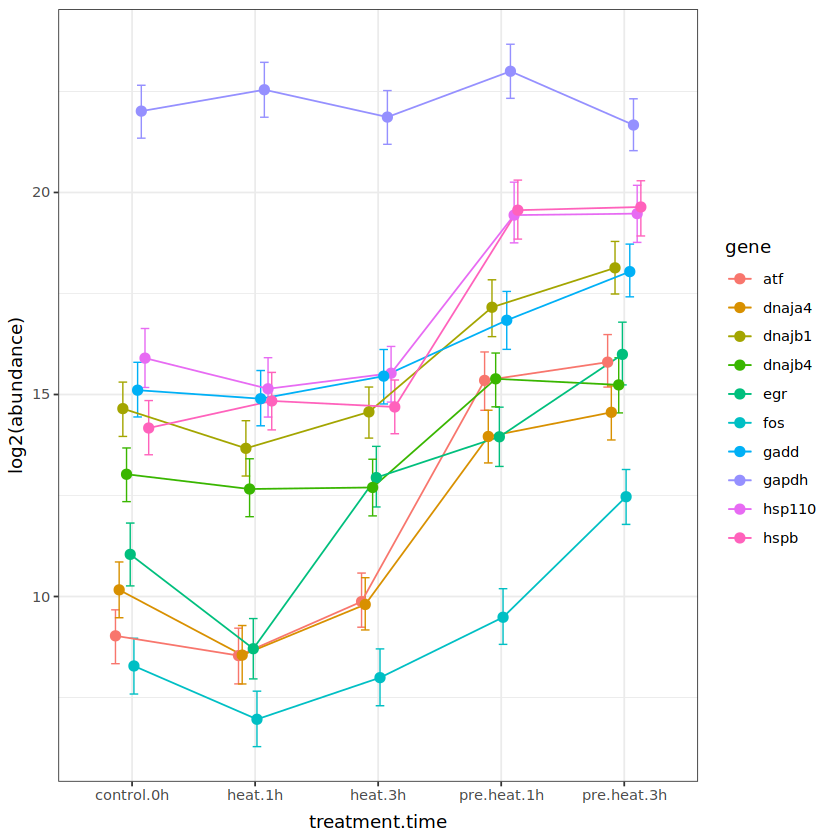

In [199]:
s1=HPDsummary(model=naive,data=qs)

In [145]:
#mm=naive
#data=qs
mm=classic
data=dl
genes=NA
relative=TRUE
summ.plot=TRUE
ptype="z"
base=2
	gene.results=list()
	trms=attr(terms(mm$Fixed$formula),"term.labels")[grep("gene:",attr(terms(mm$Fixed$formula),"term.labels"))]
	trms=sub("gene:","",trms)
	sols=colnames(mm$Sol)
	if (is.na(genes[1])) { 
		genes=sub("gene","",sols[grep("gene.*$",sols)])
		genes=unique(sub(":.*","",genes))	
	}
	facts =list()
	for (t in trms) {
		if (!grepl(":",t)) { facts =append(facts,list(levels(data[,t])))}
	}
	names(facts)=trms[1:length(facts)]
	nfactors=length(facts)
	if (nfactors>2) { 
		stop("not implemented for more than 2 crossed factors")
	}
	gsols=c();fac1=c();fac2=c();samps=c();skips=c()
	
	globalInt=rep(0,length(mm$Sol[,1]))	
	if(sols[1]=="(Intercept)") { 
		globalInt=rep(mean(mm$Sol[,"(Intercept)"]),length(mm$Sol[,1]))
	} 
	
	interaction=0
	if (nfactors==2) {
		sol=paste("gene",genes[2],":",names(facts)[1],facts[[1]][2],":",names(facts)[2],facts[[2]][2],sep="")
		if (sol %in% sols) {
			interaction=1
		}
	}

In [146]:
for (gene in genes) {
		sol=paste("gene",gene,sep="")
		if (!(sol %in% sols)) colnames(mm$Sol)[1]=sol
	}
	sols=colnames(mm$Sol)	

In [148]:
install.packages("vscDebugger")

Warning message:
“package ‘vscDebugger’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [147]:
for (gene in genes) {
		fac1g=c();fac2g=c();sampsg=c();skip=FALSE
		for (lev1 in 1:length(facts[[1]])) {
			if (nfactors==2) {
				for (lev2 in 1:length(facts[[2]])) {
					if (lev1==1 & lev2==1) { 
						sol=paste("gene",gene,sep="")
						if(sum(grep(sol,sols))==0) {
							skip=TRUE
							next
						}
						samp=(globalInt+mm$Sol[,sol])*as.numeric(!relative)
						typeof(samp)
						int0=samp
					} else {
						if (lev2==1) { 
							sol=paste("gene",gene,":",names(facts)[1],facts[[1]][lev1],sep="")
							if(sum(grep(sol,sols))==0) {
								skip=TRUE
								next
							}
							
							samp=int0+mm$Sol[,sol]
							typeof(samps)
							int2=mm$Sol[,sol]
						} else {
							if (lev1==1) { 
								sol=paste("gene",gene,":",names(facts)[2],facts[[2]][lev2],sep="") 
								if(sum(grep(sol,sols))==0) {
									skip=TRUE
									next
								}
								samp=int0+mm$Sol[,sol]
								int1=mm$Sol[,sol]
							} else {
								sol=paste("gene",gene,":",
								names(facts)[1],facts[[1]][lev1],
								":",names(facts)[2],facts[[2]][lev2],sep="") 
								if(sum(grep(sol,sols))==0 & interaction==1) {
									skip=TRUE
									next
								}
								if (interaction==1) {
									samp=int0+int1+int2+mm$Sol[,sol]
									print(typeof(samps))
								} else { 
									samp=int0+int1+int2
									print(typeof(samps))
								}
							}
						}
					}
		#			print(paste(lev1,lev2,sol))
					if (skip) { 
#						genes=genes[!(genes %in% gene)]						
						next 
					}
					gsols=append(gsols,gene)
					fac1g=append(fac1g,facts[[1]][lev1])
					fac2g=append(fac2g,facts[[2]][lev2])
					sampsg=cbind(sampsg,samp)
					print(typeof(samps))
				}
			} else {
				if (lev1==1) { 
						sol=paste("gene",gene,sep="") 
						if(sum(grep(sol,sols))==0) {
							skip=TRUE
							next
						}
						samp=(globalInt+mm$Sol[,sol])*as.numeric(!relative)
						typeof(samps)
						int0=samp
						print(typeof(samps))
				} else {
					sol=paste("gene",gene,":",
					names(facts)[1],facts[[1]][lev1],sep="")
					if(sum(grep(sol,sols))==0) {
						skip=TRUE
						next
					print(typeof(samps))
					}
					samp=int0+mm$Sol[,sol]
					print(typeof(samps))
				}
				if (skip) { 
#					genes=genes[!(genes %in% gene)]
					next 
				}
				gsols=append(gsols,gene)
				fac1g=append(fac1g,facts[[1]][lev1])
				sampsg=cbind(sampsg,samp)
				print(typeof(samps))
			}
		}
		if (skip) { 
			skips=append(skips,gene)
			next 
		}
		fac1=append(fac1,fac1g)
		samps=cbind(samps,sampsg)
		print("oh")
		print(typeof(samps))
		if (nfactors==2) { fac2=append(fac2,fac2g) }
		sampsg=data.frame(sampsg)
		if (nfactors==2) {
			gres=matrix(nrow=length(fac1g),ncol=length(fac1g),
			dimnames=list("pvalue"=paste(names(facts)[1],fac1g,":",
			names(facts)[2],fac2g,sep=""),
			"difference"=paste(names(facts)[1],fac1g,":",
			names(facts)[2],fac2g,sep="")))
			print(typeof(samps))
		} else { 
			gres=matrix(nrow=length(fac1g),ncol=length(fac1g),
			dimnames=list("pvalue"=fac1g,"difference"=fac1g))
		}
		for (i in 1:(length(fac1g)-1)) {
			for (j in (i+1):length(fac1g)) {
				diff=sampsg[,j]-sampsg[,i]
				gres[j,i]=mcmc.pval(diff,ptype=ptype)
				gres[i,j]=mean(diff)/log(base)
				print(typeof(samps))
			}	
		}		
		print(typeof(samps))
		print("ohn")
		gene.results=append(gene.results,list(gres))
		names(gene.results)[length(gene.results)]=gene		
		print(typeof(samps))
	}
			print(typeof(samps))

[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"
[1] "NULL"

In [138]:
print(typeof(samps))

[1] "double"


In [90]:
genes=genes[!(genes %in% skips)]
	for (ge in skips) { 
		gsols=gsols[-c(grep(ge,gsols))]		
	}
	big.summary=data.frame(cbind("gene"=gsols,"f1"=fac1))
	names(big.summary)[2]=names(facts[1])
	if(nfactors==2) {
		big.summary$f2=fac2
		names(big.summary)[3]=names(facts[2])
	}
		print("check3")
		print(samps)
	samps=apply(samps,2, function(x){ return(x/log(base)) })
	mns=apply(samps,2,mean)
	sds=apply(samps,2,sd)
	lower=apply(samps,2,function(x) { return(quantile(x,0.05)) })
	upper=apply(samps,2,function(x) { return(quantile(x,0.95)) })
	big.summary=cbind(big.summary,"mean"=mns,
	"sd"=sds,"lower"=lower,"upper"=upper)
	ploo=NULL

[1] "check3"
NULL


ERROR: Error in apply(samps, 2, function(x) {: dim(X) must have a positive length


In [89]:
if(relative) {
		if (nfactors==2) { 
			remov=which(
				big.summary[,2]==facts[[1]][1] & big.summary[,3]==facts[[2]][1]
			)
			big.summary=big.summary[-remov,] 
		} else { 	
			big.summary=big.summary[big.summary[,2]!=facts[[1]][1],] 
			}
	}
	if (is.null(xgroup)) {
		xgroup=names(facts[1])
		if(nfactors==2) { facet=names(facts[2]) }
	} else {
		if (xgroup==names(facts[1])) {
			if(nfactors==2) { facet=names(facts[2]) }
		} else {
			facet=names(facts[1])
		}
	}

ERROR: Error in eval(expr, envir, enclos): object 'xgroup' not found


In [ ]:
if(summ.plot) { 
		if (!relative) { 
			if (nfactors==2) {
				ploo=summaryPlot(big.summary,xgroup=xgroup,
				facet=facet,type="line",log.base=log.base,...) 
			} else {
				ploo=summaryPlot(big.summary,xgroup=names(facts[1]),type="line",log.base=log.base,...) 
			}
		} else {
			if (nfactors==2) {
				ploo=summaryPlot(big.summary,xgroup=xgroup,
				facet=facet,type="bar",log.base=log.base,...) 
			} else {
				ploo=summaryPlot(big.summary,xgroup=names(facts[1]),type="bar",log.base=log.base,...) 
			}
		}
	}

In [ ]:
return(list("summary"=big.summary,"geneWise"=gene.results,"ggPlot"=ploo))